# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
import pandas as pd
# data = pd.read_csv('/Users/victoria/Downloads/fraud.csv')

In [6]:
# our target column is isFraud
# data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### What is the distribution of the outcome? 

In [ ]:
# type matters, amount, nameDest of course
# isFlaggedFraud is based on the amount, so no need to use it

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [9]:
# Your code here
data.isnull().values.any()

False

In [11]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# we could change step column, but why?

In [12]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
# dummies for type?
# what to do with names? they are not important, i think

In [22]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [27]:
data.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [24]:
data = pd.get_dummies(data=data, drop_first=True)

In [13]:
data['isFraud'].value_counts()
#huge disproportion, let's try with it

0    6354407
1       8213
Name: isFraud, dtype: int64

In [26]:
data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

### Run a logisitc regression classifier and evaluate its accuracy.

In [28]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data_x = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
data_y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
 
ks_model = LogisticRegression().fit(X_train, y_train)
y_pred = ks_model.predict(X_test)
accuracy_score(y_test, y_pred)
#so the model is clearly overfitted, we should fix that

0.9982389330181591

Random under-sampling:
1    8213
0    8213
Name: isFraud, dtype: int64


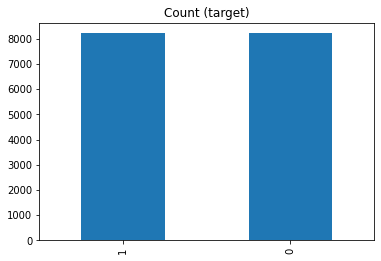

In [29]:
count_no_fraud, count_fraud = data.isFraud.value_counts()

# Divide by class
df_no_fraud = data[data['isFraud'] == 0]
df_fraud = data[data['isFraud'] == 1]

df_no_fraud_under = df_no_fraud.sample(count_fraud)
df_test_under = pd.concat([df_no_fraud_under, df_fraud], axis=0)

print('Random under-sampling:')
print(df_test_under.isFraud.value_counts())


In [32]:
data_x = df_test_under[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
data_y = df_test_under['isFraud']
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
 
ks_model = LogisticRegression().fit(X_train, y_train)
y_pred = ks_model.predict(X_test)
accuracy_score(y_test, y_pred)
#much better!

0.9074863055386488

### Now pick a model of your choice and evaluate its accuracy.

In [35]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

data_x = df_test_under[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
data_y = df_test_under['isFraud']
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred_test = neigh.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9665246500304321

### Which model worked better and how do you know?

In [2]:
# logistic regression model after we fixed imbalance (good score of 0.91)